We are going to track our soccer ball's movement with the vector $ \left[ {\begin{array}{cc}
   x(t)  \\
   y(t)  \\
   z(t)  \\
  \end{array} } \right]$ and plot a soccer ball in a 3d coordinate system and watch it move in time as an animation.  As a side note, it is often customary to use bold letters to represent vectors, and we will often write, ${\bf{x}}= \left[ {\begin{array}{cc}
   x(t)  \\
   y(t)  \\
   z(t)  \\
  \end{array} } \right]$ as shorthand to represent all three coordinates as functions of time. To begin, we first need to review some physics.
  
The motion of bodies are governed by newton's second law of motion-- $force = mass \times acceleration$.  Recall from calculus and physics that the acceleration of and object is given by the second derivative of the position of the object. In one dimension (where we have the position given by $x(t)$, acceleration is given by, 

$a(t)=\frac{d^2x(t)}{dt^2}=x^{''}(t)$. 

In more than one dimension, where the position is represented as vectors, we treat the time derivatives of each position variable separately. (Can you explain why?)
Therefore we may write the acceleration vector as 

${\bf{a}}(t)=\frac{d^2{\bf{x}}(t)}{dt^2}={\bf{x}}^{''}(t)= \left[ {\begin{array}{cc}
   x^{''}(t)  \\
   y^{''}(t)  \\
   z^{''}(t)  \\
  \end{array} } \right]$. 
  
If we can write down the forces acting on the ball as a function of time, we can write

 ${\bf{f}}(t) = m {\bf{x}}^{''}(t)$
 
 and integrate the equation to "track" the ball's position (more on the integration in a bit).
 To determine the forces on the ball we use (you guessed it!) a free-body diagram. First we will start by drawing the free-body diagram for the ball with only gravity acting on it. Later we will add in other forces to make the ball's trajectory more interesting.  

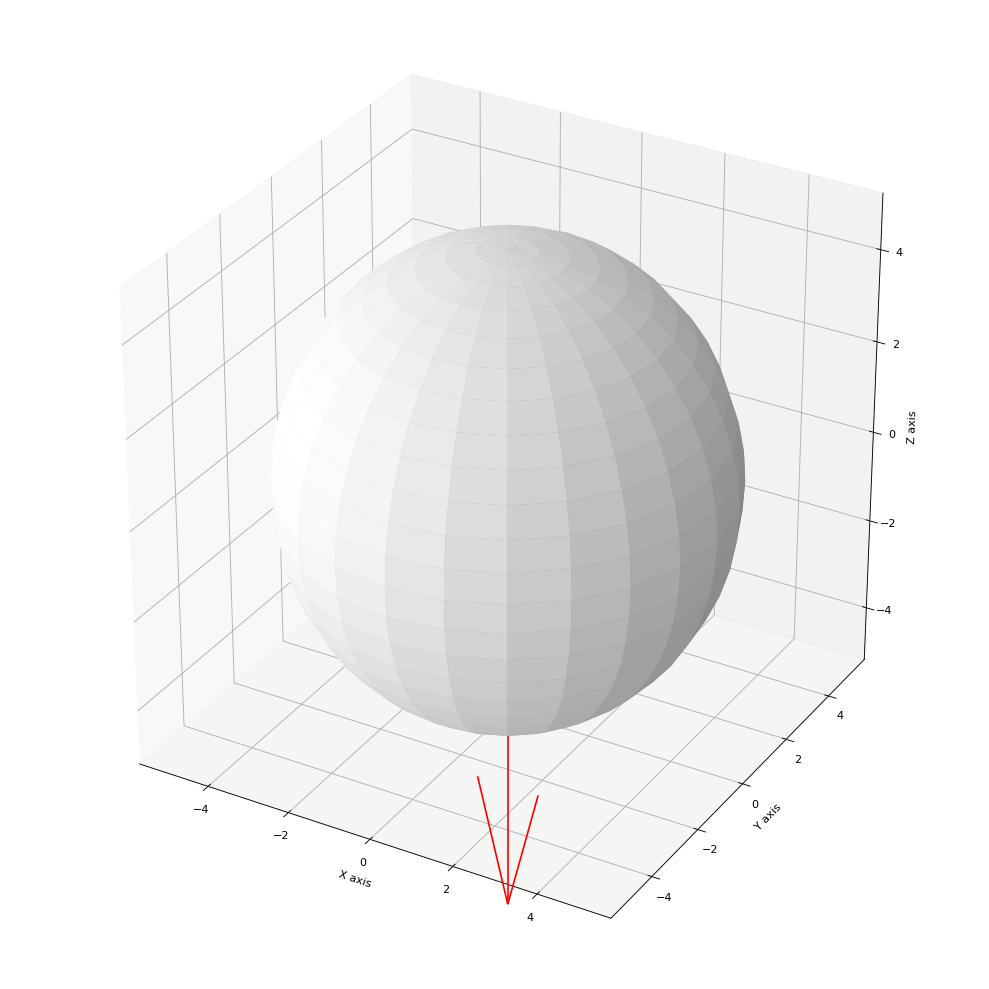

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 

#initialize the figure 
fig = plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, aspect= 'equal',projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 25)
v = np.linspace(0, np.pi, 25)
x = 5 * np.outer(np.cos(u), np.sin(v))
y = 5 * np.outer(np.sin(u), np.sin(v))
z = 5 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface

Q= ax.quiver([0],[0],[0],[0],[0],[-9.81],color='r' )
#ax.quiverkey(Q, 0.9, 0.9, 2, r'$f_{gravity}$', labelpos='E',coordinates='figure')
ax.plot_surface(x, y, z, color='w')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

No matter the position of the ball in space gravity is always acting downwards as the vector ${\bf{f}}_{gravity}=m \left[ {\begin{array}{cc}
   0  \\
   0  \\
   -9.81 \frac{m}{s^2}  \\
  \end{array} } \right]$.  
  If we were working in one dimension we can write the differential equation (more on these later in the semester)
  
  $m a(t)=f_{gravity}$
  
  $m \frac{d^2z}{t^2} = mg = m(-9.81m/s^2)$,
  
  and we can integrate twice to get the kinematics equation from physics.
  
  $z(t) = \frac{1}{2}gt^2+v(0)t +z(0)$.
  
  As we discussed above, our forces and acceleration are now vectors living in three dimensions.  Can you write down the differential equations we need to integrate?
  
For the same reason that derivatives of vectors act component wise, integration for vectors is also component wise.  Can you write down the final equation for the projectile motion of our ball in vector form? (Hint: integrate the vector f=ma equation component wise)

Below is a script that calculates the trajectory of the ball and out puts the coordinates in an "xyz" file that can be viewed in vmd.  The "pos" array written at the top of the scripts gives the coordinates for the vertices of a truncated icosahedron (soccer ball) as rows of the array.  The center of the ball is the origin.  The function "vecX($t$)" calculates the position of the center of the ball at time $t$.  How do we get the positions of the vertices of the ball at a given time $t$? Why does this work?

In [22]:
import numpy as np
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import animation, rc
#import matplotlib.pyplot as plt
#from IPython.display import HTML
# initial velocity vector in cm/s

#initial positions array for vertices of soccer ball (I did this by hand)
a = (1+np.sqrt(5))/2
pos = np.array([[0,1, 3*a],[0,-1,-3*a],[0,1, -3*a],[0,-1,3*a],
[3*a,0,1],[-3*a,0,-1],[3*a,0,-1],[-3*a,0,1],
[1, 3*a,0],[-1,-3*a,0],[1, -3*a,0],[-1,3*a,0],
[1,(2+a), 2*a],[-1,-(2+a), -2*a],[1,-(2+a), -2*a],[-1,(2+a), 2*a],[-1,-(2+a), 2*a],[1,(2+a), -2*a],[1,-(2+a), 2*a],[-1,(2+a), -2*a],
[2*a, 1, (2+a)],[-2*a, -1,-(2+a)],[2*a, -1, -(2+a)],[-2*a, 1,(2+a)], [-2*a, -1, (2+a)],[2*a, 1,-(2+a)],[2*a, -1, (2+a)],[-2*a, 1,-(2+a)],           
[(2+a),2*a,1],[-(2+a),-2*a,-1],[(2+a),-2*a,-1],[-(2+a),2*a,1],[-(2+a),-2*a,1],[(2+a),2*a,-1],[(2+a),-2*a,1],[-(2+a),2*a,-1],
[2,(1+2*a), a], [-2,-(1+2*a), -a], [2,(1+2*a), -a],[-2,-(1+2*a), a],  [2,-(1+2*a), a],[-2,(1+2*a), -a],[2,-(1+2*a), -a],[-2,(1+2*a), a],
[(1+2*a),a, 2], [-(1+2*a),-a, -2], [(1+2*a),-a, -2], [-(1+2*a),a, 2],[(1+2*a),a, -2], [-(1+2*a),-a, 2],[-(1+2*a),a, -2], [(1+2*a),-a, 2],
[a,2, (1+2*a)], [-a,-2, -(1+2*a)], [a,2, -(1+2*a)], [-a,-2, (1+2*a)], [a,-2, -(1+2*a)], [-a,2, (1+2*a)], [a,-2, (1+2*a)], [-a,2, -(1+2*a)]])

#scale to correct radius
pos = 11.0/5.0* pos 

#initial velocity vector, units cm/s
initVel = np.array([0,2600.0, 700.0])




# initial position for center of ball
initPos = np.array([0,0,0])

# prints the initial speed of the ball 
print "Intitial Speed is " + "%10.3f" %np.linalg.norm(initVel)+ " cm/s"

# gravity vector, units of cm/s^2
gravityVec = np.array([0,0,-981.0])

# position of ball as vector in time
def vecX(t):
    return 0.5*gravityVec *t**2+ initVel*t + initPos

numsteps = 250
timeInt  = 1.0

handle = open('ballGrav.xyz', 'w')

for i in range(numsteps):
    vec = vecX(timeInt/numsteps*i)
    newPositions = pos + vec
    s= ''
    s += str(60)+ '\n\n'
    for j in range(np.shape(pos)[0]):
        s += '%-3s %10.5f %10.5f %10.5f\n' % ('c', newPositions[j,0],newPositions[j,1],newPositions[j,2])
    handle.write(s)
handle.close()


Intitial Speed is   2692.582 cm/s
